In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
from PIL import Image

In [29]:
pip install opencv-python

In [30]:
pip install matplotlib

In [31]:
import cv2
import os
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Displaying Images

In [32]:
files = os.listdir(os.path.join('/content/drive/MyDrive/cvasg2'))
images=[]
#iterating through each file in the folder
for file in files:
    #checking if the file is an image file
    if file.endswith('.jpg'):
        img = Image.open(os.path.join('/content/drive/MyDrive/cvasg2', file))
        images.append(Image.open(os.path.join('/content/drive/MyDrive/cvasg2', file)))

Displaying the images

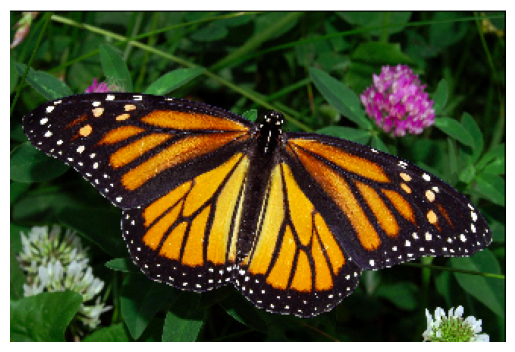

In [33]:
plt.imshow(images[0])
plt.axis('off')
plt.show()

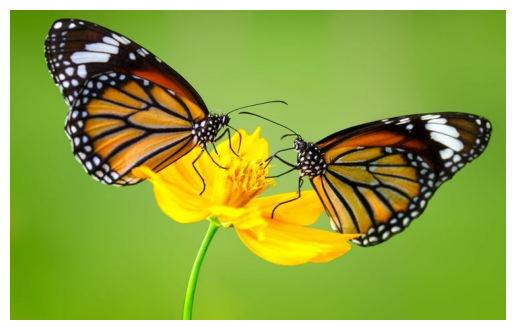

In [34]:
plt.imshow(images[1])
plt.axis('off')
plt.show()

Applying K-Means clustering, first, without resizing the image for better clarity

Number of clusters = 3


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


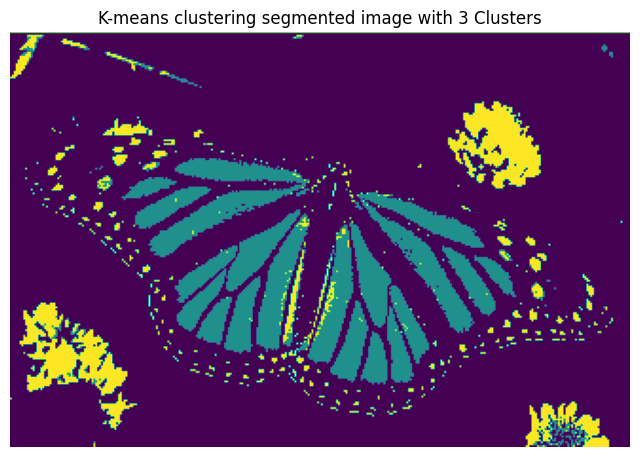

------------------------------------------------------
Number of clusters = 6


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


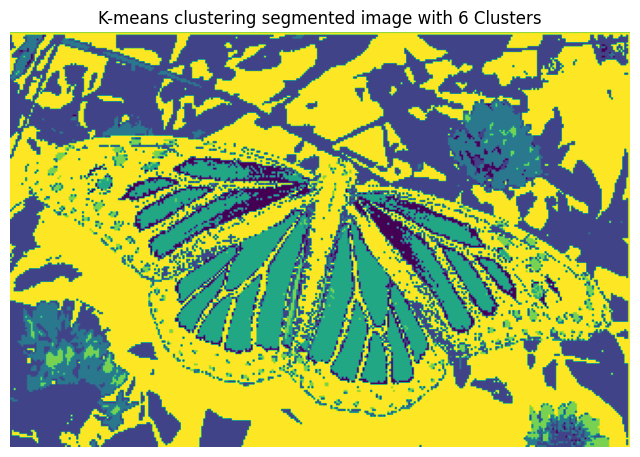

------------------------------------------------------
###########################################################
Number of clusters = 3


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


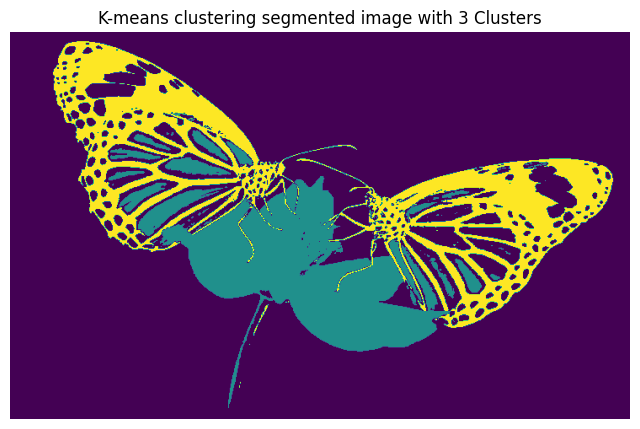

------------------------------------------------------
Number of clusters = 6


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


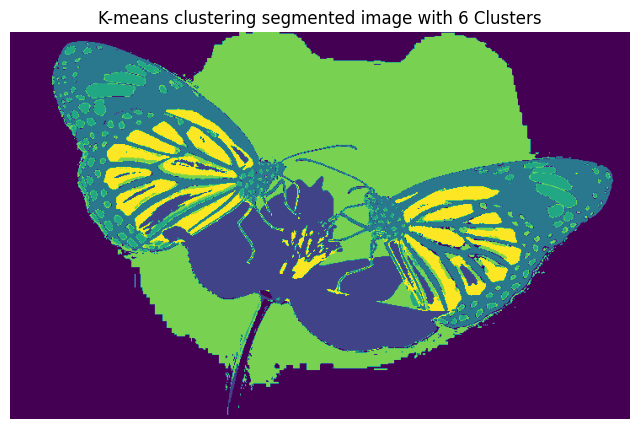

------------------------------------------------------
###########################################################


In [35]:
#iterating through each image in the list
for image in images:
    #converting the image to numpy array
    img_array = np.array(image)

    #flattening the image array
    img_flat = img_array.reshape((-1, 3))

    #iterate through each number of clusters as 3 and 6
    for k in [3,6]:
        print(f"Number of clusters = {k}")
        #initialising the KMeans model with the specified number of clusters
        kmeans = KMeans(n_clusters=k, random_state=0)

        #fitting the model to the flattened image data
        kmeans.fit(img_flat)

        #getting the labels and cluster centers
        labels = kmeans.labels_
        centers = kmeans.cluster_centers_

        #reshaping the labels back to the original image shape
        segmented_img = labels.reshape(img_array.shape[:2])

        #displaying the segmented image
        plt.figure(figsize=(8, 8))
        plt.imshow(segmented_img, cmap='viridis')
        plt.title(f'K-means clustering segmented image with {k} Clusters')
        plt.axis('off')
        plt.show()
        print("------------------------------------------------------")
    print("###########################################################")

Applying K-Means clustering without resizing the image to 64x64 for lessen computational cost

In [36]:
images=[]
for file in files:
    if file.endswith('.jpg'):
        img = Image.open(os.path.join('/content/drive/MyDrive/cvasg2', file))
        #resizing the image to 64x64
        img_resized = img.resize((64, 64))
        images.append(img_resized)

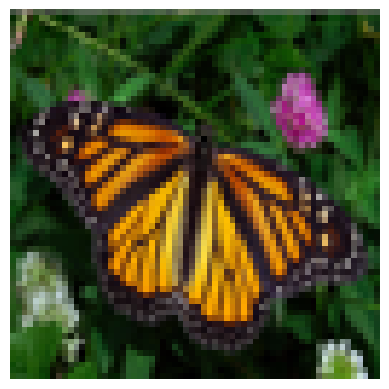

In [37]:
plt.imshow(images[0])
plt.axis('off')
plt.show()

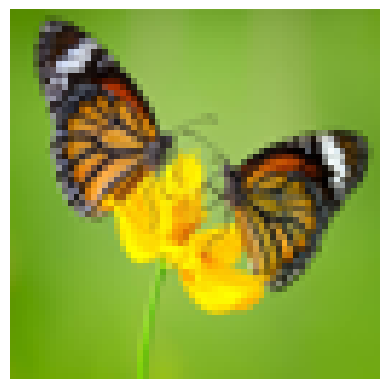

In [38]:
plt.imshow(images[1])
plt.axis('off')
plt.show()

In [43]:
# Function to evaluate ratio cut
def evaluate_ratio_cut(image, segmentation):
    # Compute ratio cut
    region_1 = np.where(segmentation == 0)
    region_2 = np.where(segmentation == 1)
    ratio_cut = np.sum(image[region_1]) / np.sum(image[region_2])
    return ratio_cut

In [44]:
# Function to evaluate intra-cluster distance
def evaluate_intra_cluster_distance(image, segmentation):
    intra_distances = []
    for label in np.unique(segmentation):
        region = np.where(segmentation == label)
        centroid = np.mean(image[region])
        distances = np.linalg.norm(image[region] - centroid)
        intra_distances.append(distances)
    return np.mean(intra_distances)

Number of clusters = 3


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


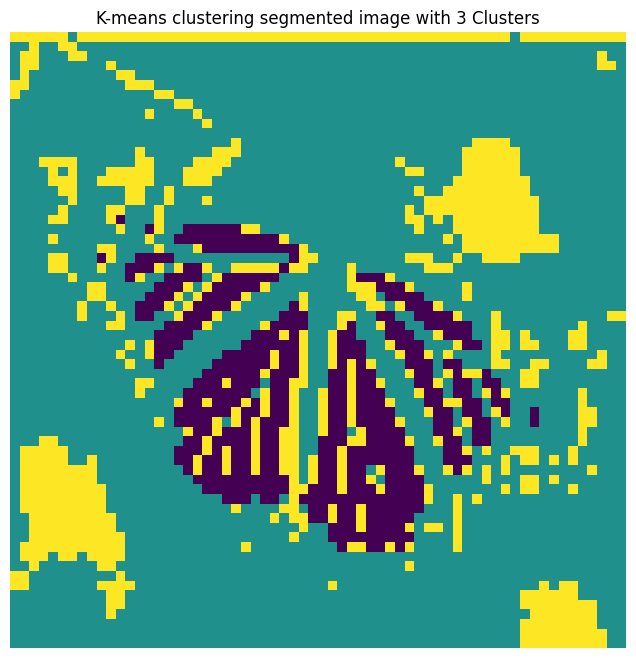

------------------------------------------------------
Number of clusters = 6


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


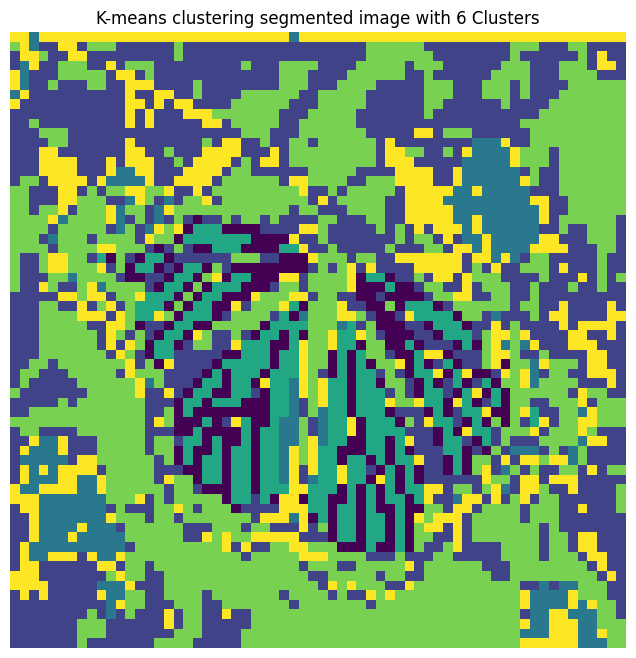

------------------------------------------------------
##########################################################
Number of clusters = 3


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


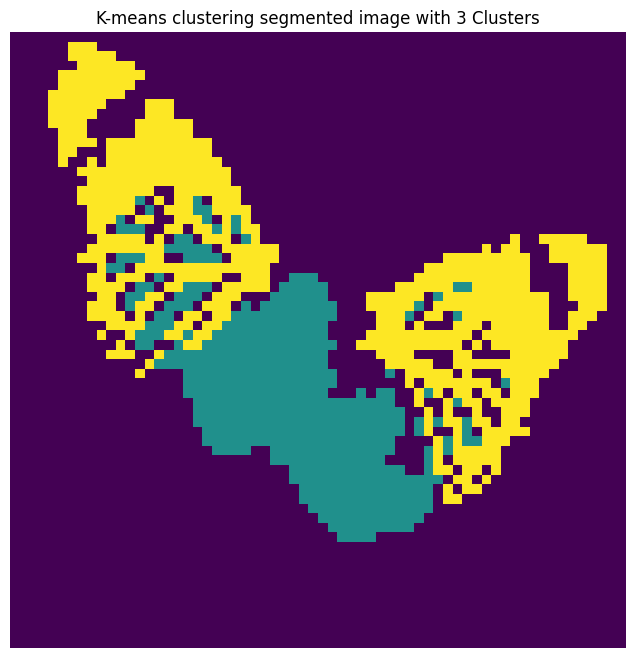

------------------------------------------------------
Number of clusters = 6


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


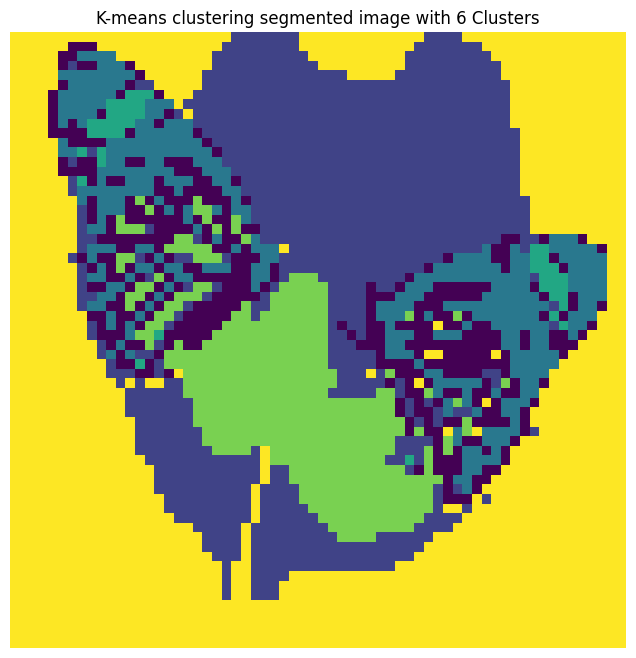

------------------------------------------------------
##########################################################


In [39]:
for image in images:
    img_array = np.array(image)
    img_flat = img_array.reshape((-1, 3))
    for k in [3, 6]:
        print(f"Number of clusters = {k}")
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(img_flat)
        labels = kmeans.labels_
        centers = kmeans.cluster_centers_
        segmented_img = labels.reshape(img_array.shape[:2])
        plt.figure(figsize=(8, 8))
        plt.imshow(segmented_img, cmap='viridis')
        plt.title(f'K-means clustering segmented image with {k} Clusters')
        plt.axis('off')
        plt.show()
        print("------------------------------------------------------")
    print("##########################################################")

## **Ratio-cut clustering**

In [40]:
from skimage import io, color
from sklearn.preprocessing import StandardScaler
from skimage.transform import resize

Image- I
Number of clusters = 3

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


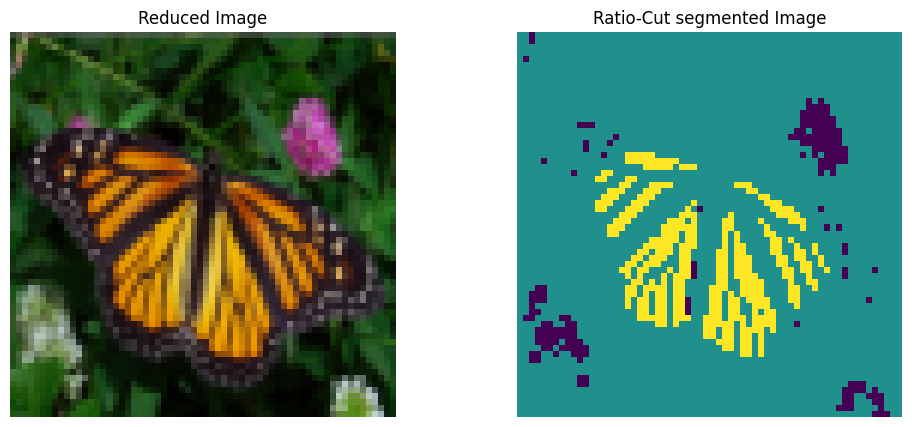

In [41]:
def load_and_preprocess_image(filename, resize_shape=(64, 64)):
    if filename.endswith(".jpg"):
        img = io.imread(filename)
        img = resize(img, resize_shape)
    return np.array(img)

#loading and preprocessing image
filename = "/content/drive/MyDrive/cvasg2/image1.jpg"
image = load_and_preprocess_image(filename)

#flattening image to feature vector
X = image.reshape(-1, 3) #flattening while keeping RGB channels

#performing ratio-cut
sigma = 1  #optimal value of sigma
A = -1 * np.square(X[:, None, :] - X[None, :, :]).sum(axis=-1)
A = np.exp(A / (2 * sigma ** 2))
np.fill_diagonal(A, 0)

#laplacian graph
I = np.zeros_like(A)
np.fill_diagonal(I, 1)
D = np.zeros_like(A)
np.fill_diagonal(D, np.sum(A, axis=1))
D_inv_sqrt = np.linalg.inv(np.sqrt(D))
L = I - np.dot(D_inv_sqrt, A).dot(D_inv_sqrt)

#eigenvalues-cum-eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(L)
eigenvalues = eigenvalues.real
eigenvectors = eigenvectors.real
ind = np.argsort(eigenvalues, axis=0)
eigenvalues_sorted = np.take_along_axis(eigenvalues, ind, axis=0)
eigenvectors_sorted = eigenvectors.take(ind, axis=1)

#selecting subset of eigenvectors
X_transformed = eigenvectors_sorted[:, :6]

#standardising the transformed pixel data
scaler = StandardScaler()
X_transformed_scaled = scaler.fit_transform(X_transformed)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_transformed_scaled)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.imshow(image)
ax1.axis('off')
ax1.set_title('Reduced Image')

segmented_img = kmeans.labels_.reshape(image.shape[:2])
ax2.imshow(segmented_img, cmap='viridis')
ax2.axis('off')
ax2.set_title('Ratio-Cut segmented Image')

plt.show()

In [ ]:
Image- II
Number of clusters = 3

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


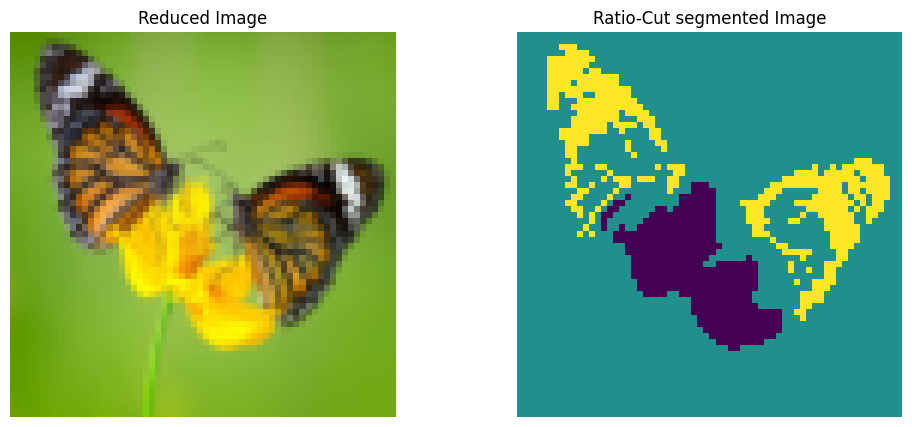

In [45]:
filename = "/content/drive/MyDrive/cvasg2/image2.jpg"
image = load_and_preprocess_image(filename)
X = image.reshape(-1, 3)
sigma = 1
A = -1 * np.square(X[:, None, :] - X[None, :, :]).sum(axis=-1)
A = np.exp(A / (2 * sigma ** 2))
np.fill_diagonal(A, 0)
I = np.zeros_like(A)
np.fill_diagonal(I, 1)
D = np.zeros_like(A)
np.fill_diagonal(D, np.sum(A, axis=1))
D_inv_sqrt = np.linalg.inv(np.sqrt(D))
L = I - np.dot(D_inv_sqrt, A).dot(D_inv_sqrt)
eigenvalues, eigenvectors = np.linalg.eig(L)
eigenvalues = eigenvalues.real
eigenvectors = eigenvectors.real
ind = np.argsort(eigenvalues, axis=0)
eigenvalues_sorted = np.take_along_axis(eigenvalues, ind, axis=0)
eigenvectors_sorted = eigenvectors.take(ind, axis=1)


X_transformed = eigenvectors_sorted[:, :6]
scaler = StandardScaler()
X_transformed_scaled = scaler.fit_transform(X_transformed)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_transformed_scaled)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.imshow(image)
ax1.axis('off')
ax1.set_title('Reduced Image')

segmented_img = kmeans.labels_.reshape(image.shape[:2])
ax2.imshow(segmented_img, cmap='viridis')
ax2.axis('off')
ax2.set_title('Ratio-Cut segmented Image')

plt.show()

In [ ]:
Image- I
Number of clusters = 6

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


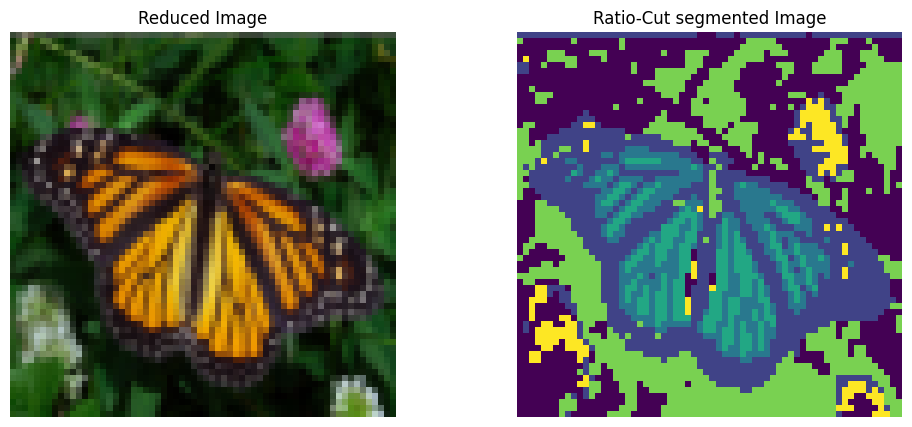

In [46]:
filename = "/content/drive/MyDrive/cvasg2/image1.jpg"
image = load_and_preprocess_image(filename)
X = image.reshape(-1, 3)
sigma = 1  #optimal value of sigma
A = -1 * np.square(X[:, None, :] - X[None, :, :]).sum(axis=-1)
A = np.exp(A / (2 * sigma ** 2))
np.fill_diagonal(A, 0)
#laplacian graph
I = np.zeros_like(A)
np.fill_diagonal(I, 1)
D = np.zeros_like(A)
np.fill_diagonal(D, np.sum(A, axis=1))
D_inv_sqrt = np.linalg.inv(np.sqrt(D))
L = I - np.dot(D_inv_sqrt, A).dot(D_inv_sqrt)
#eigenvalues-cum-eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(L)
eigenvalues = eigenvalues.real
eigenvectors = eigenvectors.real
ind = np.argsort(eigenvalues, axis=0)
eigenvalues_sorted = np.take_along_axis(eigenvalues, ind, axis=0)
eigenvectors_sorted = eigenvectors.take(ind, axis=1)
#selecting subset of eigenvectors
X_transformed = eigenvectors_sorted[:, :6]
#standardising the transformed pixel data
scaler = StandardScaler()
X_transformed_scaled = scaler.fit_transform(X_transformed)
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X_transformed_scaled)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.imshow(image)
ax1.axis('off')
ax1.set_title('Reduced Image')

segmented_img = kmeans.labels_.reshape(image.shape[:2])
ax2.imshow(segmented_img, cmap='viridis')
ax2.axis('off')
ax2.set_title('Ratio-Cut segmented Image')

plt.show()

Image- II
Number of clusters = 6

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


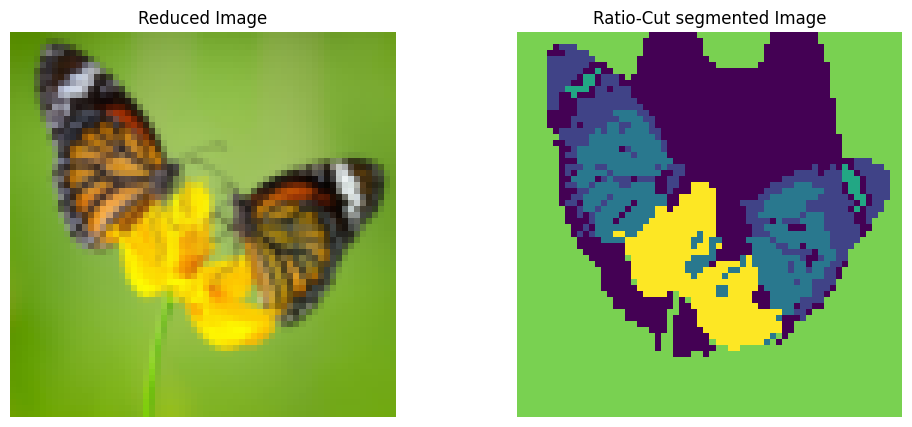

In [47]:
filename = "/content/drive/MyDrive/cvasg2/image2.jpg"
image = load_and_preprocess_image(filename)

#flattening image to feature vector
X = image.reshape(-1, 3) #flattening while keeping RGB channels

#performing ratio-cut
sigma = 1  #optimal value of sigma
A = -1 * np.square(X[:, None, :] - X[None, :, :]).sum(axis=-1)
A = np.exp(A / (2 * sigma ** 2))
np.fill_diagonal(A, 0)

#laplacian graph
I = np.zeros_like(A)
np.fill_diagonal(I, 1)
D = np.zeros_like(A)
np.fill_diagonal(D, np.sum(A, axis=1))
D_inv_sqrt = np.linalg.inv(np.sqrt(D))
L = I - np.dot(D_inv_sqrt, A).dot(D_inv_sqrt)

#eigenvalues-cum-eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(L)
eigenvalues = eigenvalues.real
eigenvectors = eigenvectors.real
ind = np.argsort(eigenvalues, axis=0)
eigenvalues_sorted = np.take_along_axis(eigenvalues, ind, axis=0)
eigenvectors_sorted = eigenvectors.take(ind, axis=1)

#selecting subset of eigenvectors
X_transformed = eigenvectors_sorted[:, :6]

#standardising the transformed pixel data
scaler = StandardScaler()
X_transformed_scaled = scaler.fit_transform(X_transformed)
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X_transformed_scaled)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.imshow(image)
ax1.axis('off')
ax1.set_title('Reduced Image')

segmented_img = kmeans.labels_.reshape(image.shape[:2])
ax2.imshow(segmented_img, cmap='viridis')
ax2.axis('off')
ax2.set_title('Ratio-Cut segmented Image')

plt.show()